In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [498]:
behaviour = pd.read_csv('user_behavior_dataset.csv')

In [500]:
behaviour.head()

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3


In [502]:
behaviour.size

7700

In [504]:
# A little about the User Behaviour Column
#Column User Behaviour Class provides us the type of engagement the consumer is doing.
#1:Inactive/Low Engagement
#2:Occasional/Light Usage
#3:Regular/Moderate Usage
#4:Active/High Engagement
#5:Power User/Very High Engagement

In [506]:
#Adding the Decription of the User Behaviour Column to the data frame
User_Behavior_Class_Description = {
    1: 'Inactive/Low Engagement',
    2: 'Occasional/Light Usage',
    3: 'Regular/Moderate Usage',
    4: 'Active/High Engagement',
    5: 'Power User/Very High Engagement'
}
behaviour['User Behavior Class Description'] = behaviour['User Behavior Class'].map(User_Behavior_Class_Description)

In [508]:
behaviour.head()

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class,User Behavior Class Description
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4,Active/High Engagement
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3,Regular/Moderate Usage
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2,Occasional/Light Usage
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3,Regular/Moderate Usage
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3,Regular/Moderate Usage


In [510]:
#Checking the na values in the dataframe
behaviour.isna().sum()

User ID                            0
Device Model                       0
Operating System                   0
App Usage Time (min/day)           0
Screen On Time (hours/day)         0
Battery Drain (mAh/day)            0
Number of Apps Installed           0
Data Usage (MB/day)                0
Age                                0
Gender                             0
User Behavior Class                0
User Behavior Class Description    0
dtype: int64

In [512]:
behaviour.describe()

,User ID,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,User Behavior Class
count,700.00000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,350.50000,271.128571,5.272714,1525.158571,50.681429,929.742857,38.482857,2.990000
std,202.21688,177.199484,3.068584,819.136414,26.943324,640.451729,12.012916,1.401476
min,1.00000,30.000000,1.000000,302.000000,10.000000,102.000000,18.000000,1.000000
25%,175.75000,113.250000,2.500000,722.250000,26.000000,373.000000,28.000000,2.000000
50%,350.50000,227.500000,4.900000,1502.500000,49.000000,823.500000,38.000000,3.000000
75%,525.25000,434.250000,7.400000,2229.500000,74.000000,1341.000000,49.000000,4.000000
max,700.00000,598.000000,12.000000,2993.000000,99.000000,2497.000000,59.000000,5.000000


In [514]:
#Name of all the columns 
behaviour.columns

Index(['User ID', 'Device Model', 'Operating System',
       'App Usage Time (min/day)', 'Screen On Time (hours/day)',
       'Battery Drain (mAh/day)', 'Number of Apps Installed',
       'Data Usage (MB/day)', 'Age', 'Gender', 'User Behavior Class',
       'User Behavior Class Description'],
      dtype='object')

In [516]:
# Lets check the correlation of different vector have on each other
behaviour[['App Usage Time (min/day)', 'Screen On Time (hours/day)',
       'Battery Drain (mAh/day)', 'Number of Apps Installed',
       'Data Usage (MB/day)', 'Age', 'User Behavior Class']].corr(method='pearson')

,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,User Behavior Class
App Usage Time (min/day),1.000000,0.950333,0.956385,0.955253,0.942308,0.004382,0.970498
Screen On Time (hours/day),0.950333,1.000000,0.948983,0.946975,0.941322,0.017232,0.964581
Battery Drain (mAh/day),0.956385,0.948983,1.000000,0.961853,0.932276,-0.002722,0.978587
Number of Apps Installed,0.955253,0.946975,0.961853,1.000000,0.934800,0.004034,0.981255
Data Usage (MB/day),0.942308,0.941322,0.932276,0.934800,1.000000,0.003999,0.946734
Age,0.004382,0.017232,-0.002722,0.004034,0.003999,1.000000,-0.000563
User Behavior Class,0.970498,0.964581,0.978587,0.981255,0.946734,-0.000563,1.000000


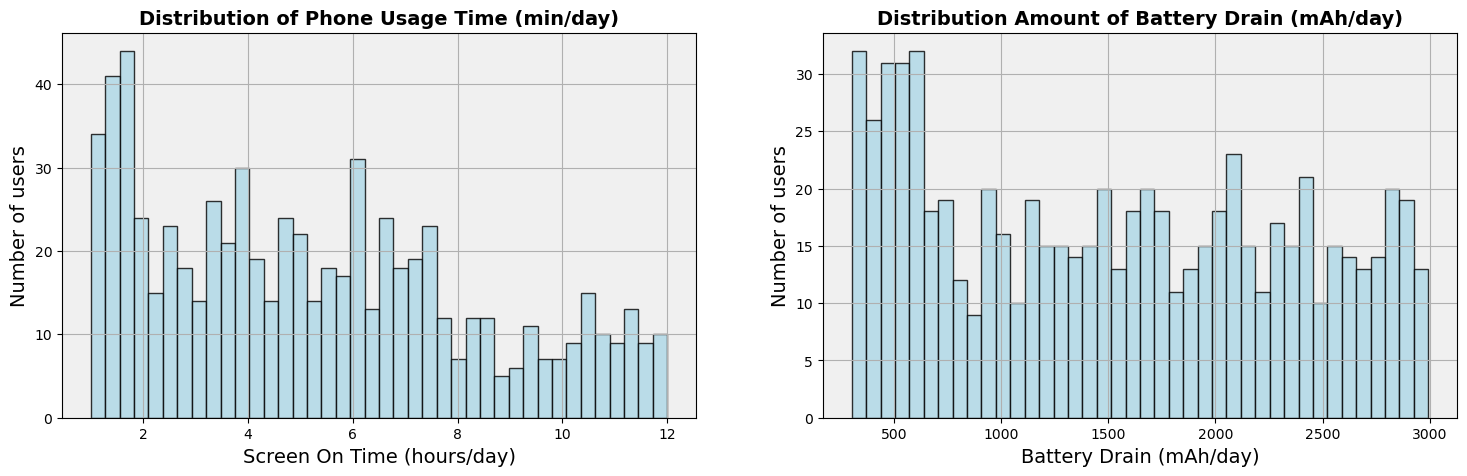

In [518]:
fig, (ax1,ax2)= plt.subplots(ncols=2,figsize=(18, 5))
ax1.set_facecolor('#f0f0f0')
ax2.set_facecolor('#f0f0f0')

#Studying the Screen ON Time
n, bins, patches = ax1.hist(behaviour['Screen On Time (hours/day)'],bins=40,color="Lightblue",edgecolor='black',alpha=0.8)
ax1.set_title('Distribution of Phone Usage Time (min/day)',fontsize=14,fontweight='bold')
ax1.set_xlabel('Screen On Time (hours/day)',fontsize=14)
ax1.set_ylabel('Number of users',fontsize=14)
ax1.grid(which='major', axis='both')

#Studying the Battery Drain Amount
n, bins, patches = ax2.hist(behaviour['Battery Drain (mAh/day)'],bins=40,color="Lightblue",edgecolor='black',alpha=0.8)
ax2.set_title('Distribution Amount of Battery Drain (mAh/day)',fontsize=14,fontweight='bold')
ax2.set_xlabel('Battery Drain (mAh/day)',fontsize=14)
ax2.set_ylabel('Number of users',fontsize=14)
ax2.grid(which='major', axis='both')

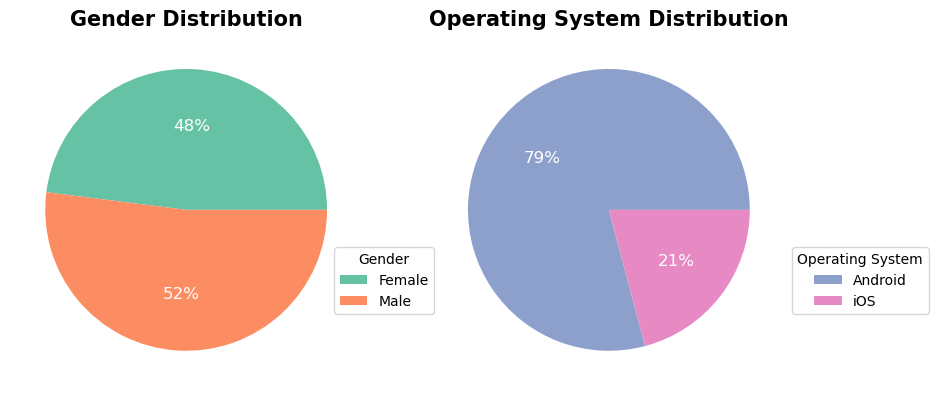

In [520]:
#Lets check the gender and OS distribution in the Dataset
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 6))

behaviour.groupby('Gender').size().plot(
    kind='pie',
    autopct='%1.0f%%',
    textprops={'fontsize': 12, 'color': 'white'},
    colors=['#66c2a5', '#fc8d62'],
    ax=ax1
)
ax1.set_title('Gender Distribution', fontsize=15, fontweight='bold')
ax1.legend(gender_counts.index, title='Gender', loc='center left', bbox_to_anchor=(0.9, 0.3))

os_counts = behaviour.groupby('Operating System').size()
ax2 = os_counts.plot(
    kind='pie',
    autopct='%1.0f%%',
    textprops={'fontsize': 12, 'color': 'white'},
    colors=['#8da0cb', '#e78ac3'],
    ax=ax2
)
ax2.set_title('Operating System Distribution', fontsize=15, fontweight='bold')
ax2.legend(os_counts.index, title='Operating System', loc='center left', bbox_to_anchor=(1, 0.3))

plt.show()

/var/folders/m5/k9gs9x6n0v98jdqp3pn5nc5w0000gn/T/ipykernel_19601/1695644778.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(np.arange(15,70,5))


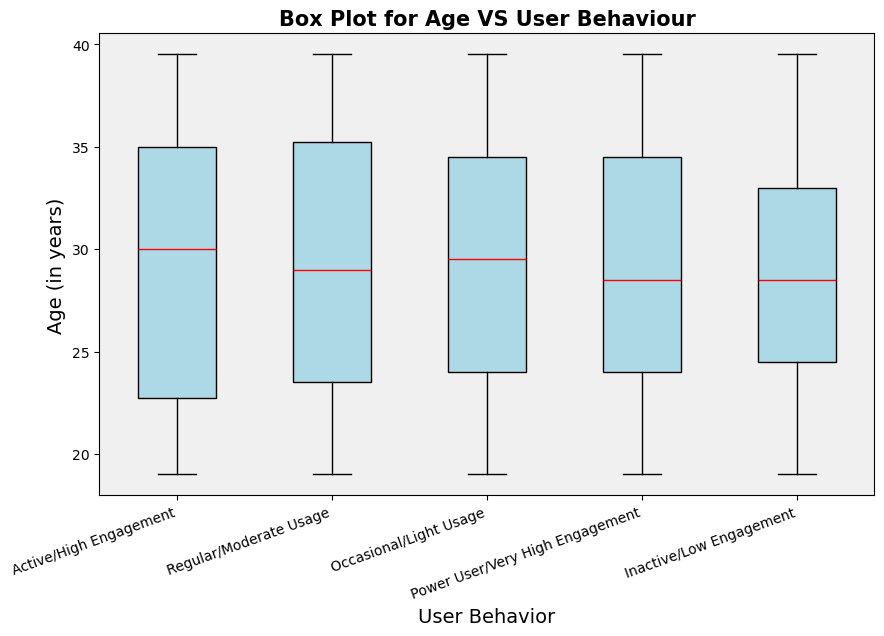

In [453]:
#Lets Study the distribution of AGE according to different User Behaviour Class
fig, ax= plt.subplots(figsize=(10, 6))
ax.set_facecolor('#f0f0f0')
ax.boxplot([behaviour[behaviour['User Behavior Class'] == label]['Age'] for label in behaviour['User Behavior Class'].unique()], patch_artist=True, boxprops=dict(facecolor='lightblue', color='black'), medianprops=dict(color='red'))

#Setting the labels corresponding to the values for User Behavior Class
x_tick = np.arange(1, len(behaviour['User Behavior Class'].unique()) + 1)
#Setting the Labels and Title
ax.set_title('Box Plot for Age VS User Behaviour', fontsize=15, fontweight='bold')
ax.set_xticks(x_tick)
ax.set_xticklabels(behaviour['User Behavior Class Description'].unique(),rotation=20,ha='right', fontsize=10)
ax.set_xlabel('User Behavior', fontsize=14)
ax.set_ylabel('Age (in years)', fontsize=14)
ax.set_yticklabels(np.arange(15,70,5))
plt.show()


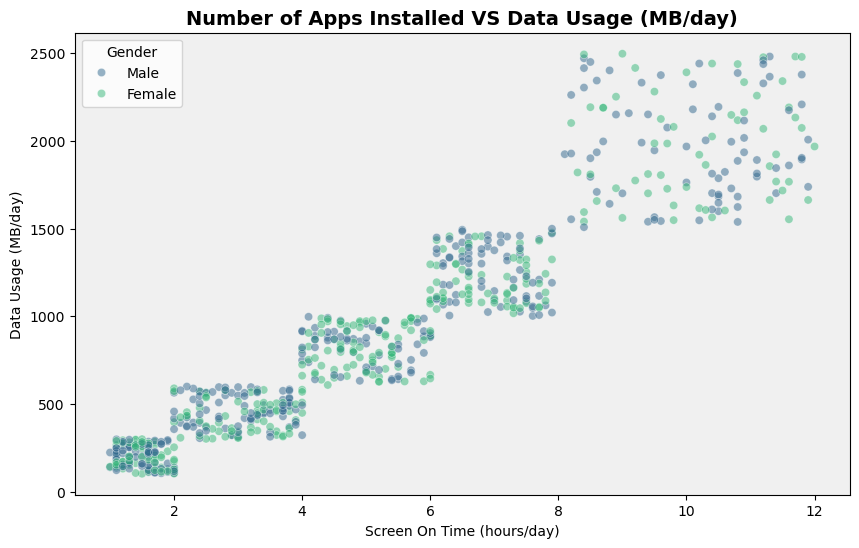

In [522]:
#Checking the distribution of the Number of Apps Installed and the Data Usage (MB/day) they haave with their Behaviour Category
fig, ax= plt.subplots(figsize=(10, 6))
ax.set_facecolor('#f0f0f0')
sns.scatterplot(data=behaviour,x='Screen On Time (hours/day)',y='Data Usage (MB/day)',hue='Gender',palette='viridis',alpha=0.5)
ax.legend(title='Gender',loc='upper left',fontsize=10)
ax.set_title('Number of Apps Installed VS Data Usage (MB/day)',fontsize=14, fontweight='bold')
plt.show()

Occasional/Light Usage, Number of Users: 146
Regular/Moderate Usage, Number of Users: 143
Active/High Engagement, Number of Users: 139
Power User/Very High Engagement, Number of Users: 136
Inactive/Low Engagement, Number of Users: 136


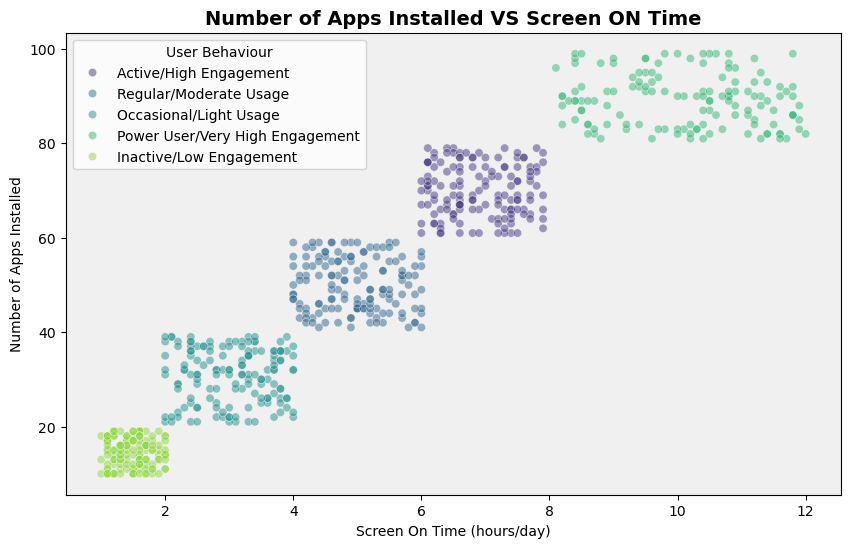

In [524]:
#Checking the distribution of the Number of Apps Installed and the Screen On Time they haave with their Behaviour Category
fig, ax= plt.subplots(figsize=(10, 6))
ax.set_facecolor('#f0f0f0')
sns.scatterplot(data=behaviour,x='Screen On Time (hours/day)',y='Number of Apps Installed',hue='User Behavior Class Description',palette='viridis',alpha=0.5)
legend=ax.legend(title='User Behaviour',loc='upper left',fontsize=10)
ax.set_title('Number of Apps Installed VS Screen ON Time',fontsize=14, fontweight='bold')

counts = behaviour['User Behavior Class Description'].value_counts()

for category, count in counts.items():
    print(f"{category}, Number of Users: {count}")
plt.show()